,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento(°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


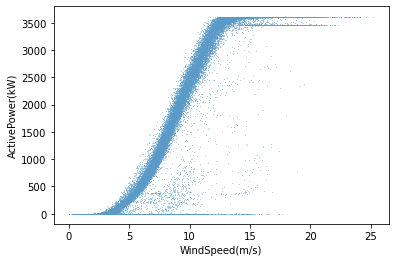

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#turbina = pd.read_csv('T1.csv')
#não consegui extrair direto do site
#https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset
import requests
URL = "https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset"  
file = requests.get(URL, stream = True)
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)','Direção do Vento(°)']
turbina['Data/hora']= pd.to_datetime(turbina['Data/hora'])
display(turbina)

graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)',s=0.5)



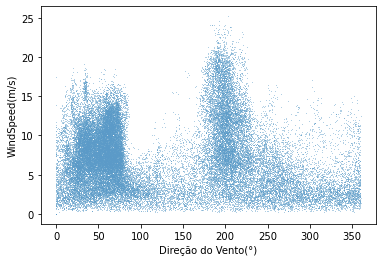

In [98]:
graf=sns.scatterplot(data=turbina, x='Direção do Vento(°)', y='WindSpeed(m/s)', s=0.5)

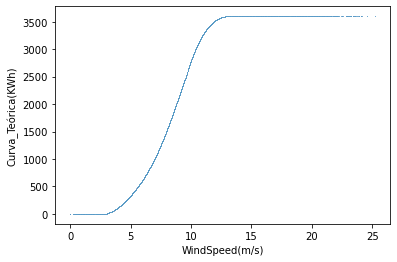

In [99]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)',s=1)

In [100]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento(°),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,Fora
...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,Dentro


In [101]:
vel_vento = turbina['WindSpeed(m/s)'].tolist()
pot_real= turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()
pot_max=[]
pot_min=[]
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia==0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
    

#print(len(pot_max),len(pot_min))

print("Potencia dentro do Limite Teórico variando (+-5%) ",(dentro_limite.count('Dentro')/len(dentro_limite)*100), '%',)



Potencia dentro do Limite Teórico variando (+-5%)  37.286760340391844 %


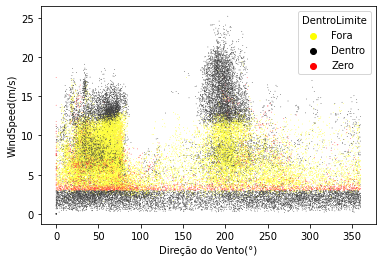

In [102]:
cores={'Dentro':'black','Fora':'yellow','Zero':'red'}
graf=sns.scatterplot(data=turbina, x='Direção do Vento(°)', y='WindSpeed(m/s)', hue = 'DentroLimite', s=0.5, palette=cores)

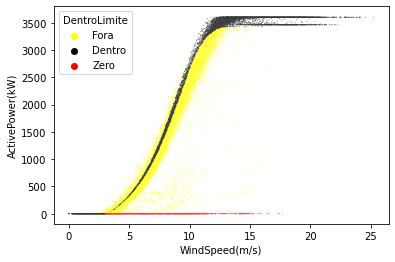

In [92]:
cores={'Dentro':'black','Fora':'yellow','Zero':'red'}
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=0.5,palette=cores)